In [1]:
#imports
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
#combine all tmbd by year files into a single dataframe
#define file path and grabbing all csv.gz files that start with final
files = os.path.join("Data", "final*.csv.gz")
#glob files together
files = glob.glob(files)
print("CSV of all years of tmdb api data");
#concat files into one dataframe
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(df.shape)
df.shape
df.head()

CSV of all years of tmdb api data
(60625, 26)


,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.100,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.000,0.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.106,1925.0,PG


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60625 entries, 0 to 60624
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                60625 non-null  object 
 1   adult                  60603 non-null  float64
 2   backdrop_path          37718 non-null  object 
 3   belongs_to_collection  3881 non-null   object 
 4   budget                 60603 non-null  float64
 5   genres                 60603 non-null  object 
 6   homepage               14780 non-null  object 
 7   id                     60603 non-null  float64
 8   original_language      60603 non-null  object 
 9   original_title         60603 non-null  object 
 10  overview               59265 non-null  object 
 11  popularity             60603 non-null  float64
 12  poster_path            55088 non-null  object 
 13  production_companies   60603 non-null  object 
 14  production_countries   60603 non-null  object 
 15  re

# Data Preprocessing

In [4]:
#remove the first line of imbd id 0 and reset index
df = df.loc[ df['imdb_id']!='0']
df = df.reset_index(drop=True)
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
1,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.100,8.0,NaN
2,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.000,0.0,NaN
3,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.106,1925.0,PG
4,tt0118852,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,...,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.900,46.0,R


In [5]:
#drop columns that are not candidate features in our testing
drop_cols = ['backdrop_path','backdrop_path','original_title','overview',
             'poster_path','status','tagline','id','homepage',
             'production_countries','video','production_companies',
             'spoken_languages',
             'original_language']
df = df.drop(columns=drop_cols)
df

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification
0,tt0113026,0.0,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",3.133,2000-09-22,0.0,86.0,The Fantasticks,5.500,22.0,NaN
1,tt0113092,0.0,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",2.253,2000-11-15,0.0,100.0,For the Cause,5.100,8.0,NaN
2,tt0116391,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",1.383,2000-04-14,0.0,152.0,Gang,0.000,0.0,NaN
3,tt0118694,0.0,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",21.407,2000-09-29,12854953.0,99.0,In the Mood for Love,8.106,1925.0,PG
4,tt0118852,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",3.515,2000-09-02,0.0,99.0,Chinese Coffee,6.900,46.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60598,tt9896876,0.0,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",4.468,2021-11-19,0.0,101.0,India Sweets and Spices,6.000,2.0,PG-13
60599,tt9898844,0.0,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",234.278,2022-01-21,0.0,91.0,The Hunting,4.800,27.0,NaN
60600,tt9900940,0.0,NaN,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",3.462,2021-12-07,0.0,87.0,The Scrapper,6.000,2.0,NaN
60601,tt9907782,0.0,NaN,0.0,"[{'id': 27, 'name': 'Horror'}, {'id': 14, 'nam...",17.439,2021-07-28,4588389.0,111.0,The Cursed,6.700,88.0,R


- Cleaning up Certification column

In [7]:
df['certification'].value_counts(dropna=False)

NaN                                45863
R                                   6132
NR                                  3317
PG-13                               3239
PG                                  1439
G                                    443
NC-17                                158
Unrated                                5
-                                      1
UR                                     1
Not Rated                              1
ScreamFest Horror Film Festival        1
R                                      1
PG-13                                  1
10                                     1
Name: certification, dtype: int64

In [8]:
#First, we will remove any extra spaces in the values
df['certification'] = df['certification'].str.strip()

In [13]:
#standardize uncommon certification ratings as Not Rate, NR
repl_cert = {'UR':'NR',
             'Not Rated':'NR',
             'Unrated':'NR',
             '-':'NR',
#setting 10 as NaN due to difficulty in interpreting the intended value
             '10':np.nan, 
             'ScreamFest Horror Film Festival':'NR'}
df['certification'] = df['certification'].replace(repl_cert)
df['certification'].value_counts(dropna=False)

NaN      45864
R         6133
NR        3326
PG-13     3240
PG        1439
G          443
NC-17      158
Name: certification, dtype: int64

# Does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

- $H_0$ (Null Hypothesis): There is no difference in the revenue of movies across all rating certifications.

- $H_A$ (Alternative Hypothesis): The rating certification has a significant affect on a movies revenue.

- Test selection

>Our target of investigation, the ratings, is categorical and our metric, revenue, is numeric. As such, we will be using the ANOVA and/or Tukey test.

>The following assumptions will be tested:
    No significant outliers,
    Equal variance,
    Normality.


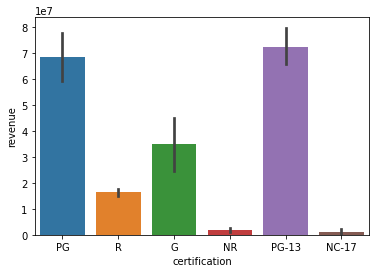

In [12]:
#initial visualization for comparison with the post test data
sns.barplot(data=df, x='certification',y='revenue');

## Testing assumptions

- Outliers

- Normality

- Equal Variance

# Are movies with lower runtimes more popular?


- $H_0$ (Null Hypothesis): 

- $H_A$ (Alternative Hypothesis):

 - Test selection

# Does a higher budget generate higher revenue for a movie?

- $H_0$ (Null Hypothesis): 

- $H_A$ (Alternative Hypothesis):

- Test selection